## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/tmp/ipykernel_808/3532433508.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

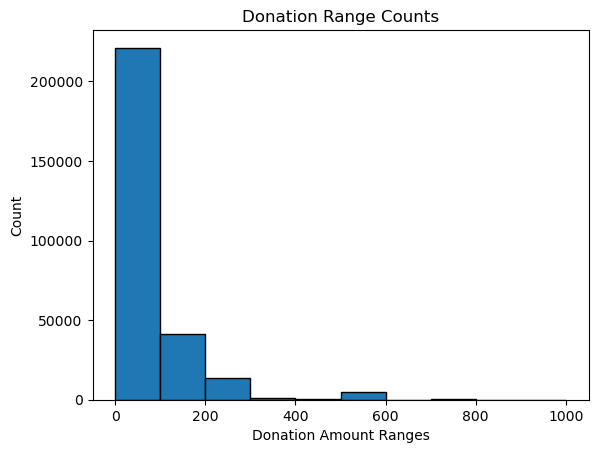

In [10]:
# 1a YOUR CODE HERE
bin_edges = [0,100,200,300,400,500,600,700,800,900,1000,float('inf')]

plt.hist(contrib['contb_receipt_amt'], bins=bin_edges, edgecolor='black')
plt.xlabel('Donation Amount Ranges')
plt.ylabel('Count')
plt.title('Donation Range Counts')
plt.show()

- **1a answer here:** Donations in the range of $0-200 seem to be the most common by far. 

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

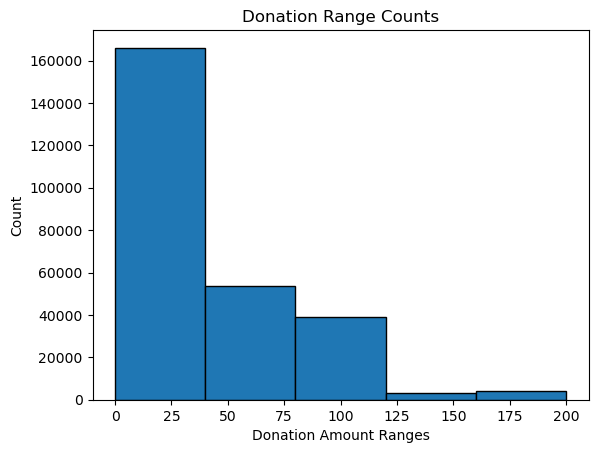

In [11]:
# 1b YOUR CODE HERE
bin_edges = [0,40,80,120,160,200]

plt.hist(contrib['contb_receipt_amt'], bins=bin_edges, edgecolor='black')
plt.xlabel('Donation Amount Ranges')
plt.ylabel('Count')
plt.title('Donation Range Counts')
plt.show()

- **1b answer here:** After zooming in to the range, it seems that the $25 seems to be the most common donation amount 

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

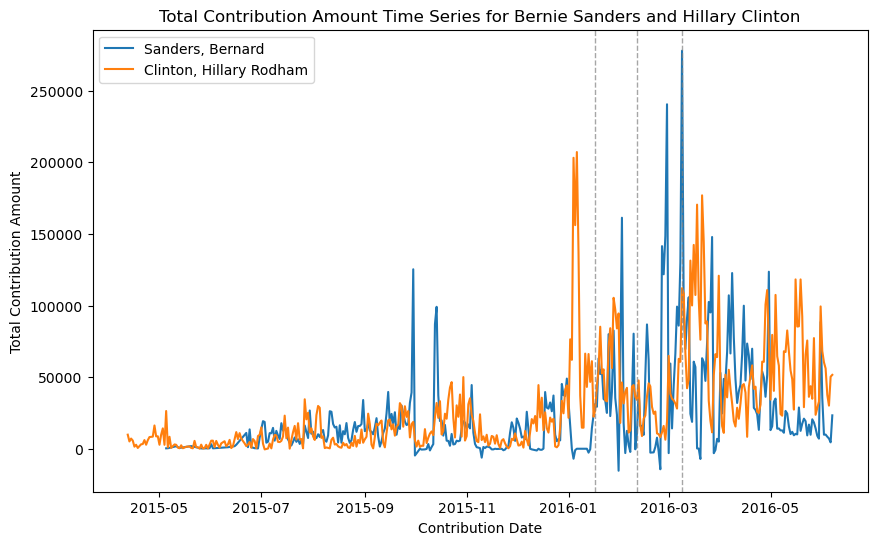

In [15]:
# 1c YOUR CODE HERE
from datetime import datetime

# Convert 'contribution_date' to datetime format
contrib['contb_receipt_dt'] = pd.to_datetime(contrib['contb_receipt_dt'])

# Filter data for Bernie Sanders and Hillary Clinton
grouped_df = contrib.groupby(['cand_nm', 'contb_receipt_dt']).agg({'contb_receipt_amt': 'sum'}).reset_index()

# Separate data for Bernie Sanders and Hillary Clinton
bernie_data = grouped_df[grouped_df['cand_nm'] == 'Sanders, Bernard']
hillary_data = grouped_df[grouped_df['cand_nm'] == 'Clinton, Hillary Rodham']

# Plot the time-series line chart
plt.figure(figsize=(10, 6))

plt.plot(bernie_data['contb_receipt_dt'], bernie_data['contb_receipt_amt'], label='Sanders, Bernard')
plt.plot(hillary_data['contb_receipt_dt'], hillary_data['contb_receipt_amt'], label='Clinton, Hillary Rodham')

# Add vertical lines for primary debate dates
debate_dates = ['2016-01-17', '2016-02-11', '2016-03-09']
for date in debate_dates:
    plt.axvline(x=datetime.strptime(date, '%Y-%m-%d'), color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Set labels and title
plt.xlabel('Contribution Date')
plt.ylabel('Total Contribution Amount')
plt.title('Total Contribution Amount Time Series for Bernie Sanders and Hillary Clinton')

# Show legend
plt.legend()

# Show the plot
plt.show()

- **1c answer here:** Looks like the debates provided significantly more donations for Bernie, over Hillary. After the second debate, Hillary's donations decreased.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [18]:
# 2a YOUR CODE HERE
donation_counts = contrib['cand_nm'].value_counts().reset_index()
donation_counts.columns = ['Candidate','Number of Donations']

donation_counts = donation_counts.sort_values(by='Number of Donations', ascending=False)
print(donation_counts)

                    Candidate  Number of Donations
0            Sanders, Bernard               165101
1     Clinton, Hillary Rodham                64991
2   Cruz, Rafael Edward 'Ted'                32378
3         Carson, Benjamin S.                13569
4                Rubio, Marco                 8555
5                  Paul, Rand                 3357
6                   Bush, Jeb                 1355
7            Trump, Donald J.                 1259
8              Fiorina, Carly                  855
9             Kasich, John R.                  580
10             Huckabee, Mike                  531
11              Walker, Scott                  522
12           Lessig, Lawrence                  353
13   Christie, Christopher J.                  249
14    O'Malley, Martin Joseph                  154
15         Graham, Lindsey O.                   79
16              Johnson, Gary                   66
17                Stein, Jill                   35
18              Jindal, Bobby  

- **2a answer here:** Bernie Sanders received the highest amount of contributions

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [19]:
# 2b YOUR CODE HERE
candidate_total_contributions = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index()
candidate_total_contributions.columns = ['Candidate', 'Total Contributions']

# Sort the table by the total contributions in descending order
candidate_total_contributions = candidate_total_contributions.sort_values(by='Total Contributions', ascending=False)

# Display the table
print(candidate_total_contributions)

                    Candidate  Total Contributions
3     Clinton, Hillary Rodham        11,537,378.84
17           Sanders, Bernard         8,613,443.09
16               Rubio, Marco         3,436,475.84
4   Cruz, Rafael Edward 'Ted'         3,058,044.81
1         Carson, Benjamin S.         1,789,967.37
0                   Bush, Jeb         1,278,454.33
14                 Paul, Rand           443,336.16
21              Walker, Scott           427,099.90
20           Trump, Donald J.           384,215.47
2    Christie, Christopher J.           381,850.00
10            Kasich, John R.           297,877.75
7              Huckabee, Mike           230,890.60
5              Fiorina, Carly           182,001.00
11           Lessig, Lawrence           148,032.52
12    O'Malley, Martin Joseph            80,725.26
6          Graham, Lindsey O.            64,745.00
9               Johnson, Gary            31,587.80
8               Jindal, Bobby            17,731.26
22      Webb, James Henry Jr.  

- **2b answer here:** Hillary Clinton raised the most money 

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [20]:
# 2c YOUR CODE HERE
merged_table = pd.merge(donation_counts, candidate_total_contributions, on='Candidate')
merged_table = merged_table.sort_values(by='Total Contributions', ascending=False)

print(merged_table)

                    Candidate  Number of Donations  Total Contributions
1     Clinton, Hillary Rodham                64991        11,537,378.84
0            Sanders, Bernard               165101         8,613,443.09
4                Rubio, Marco                 8555         3,436,475.84
2   Cruz, Rafael Edward 'Ted'                32378         3,058,044.81
3         Carson, Benjamin S.                13569         1,789,967.37
6                   Bush, Jeb                 1355         1,278,454.33
5                  Paul, Rand                 3357           443,336.16
11              Walker, Scott                  522           427,099.90
7            Trump, Donald J.                 1259           384,215.47
13   Christie, Christopher J.                  249           381,850.00
9             Kasich, John R.                  580           297,877.75
10             Huckabee, Mike                  531           230,890.60
8              Fiorina, Carly                  855           182

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [21]:
# 2d YOUR CODE HERE
merged_table['Average Donation'] = merged_table['Total Contributions'] / merged_table['Number of Donations']
print(merged_table)

                    Candidate  Number of Donations  Total Contributions  \
1     Clinton, Hillary Rodham                64991        11,537,378.84   
0            Sanders, Bernard               165101         8,613,443.09   
4                Rubio, Marco                 8555         3,436,475.84   
2   Cruz, Rafael Edward 'Ted'                32378         3,058,044.81   
3         Carson, Benjamin S.                13569         1,789,967.37   
6                   Bush, Jeb                 1355         1,278,454.33   
5                  Paul, Rand                 3357           443,336.16   
11              Walker, Scott                  522           427,099.90   
7            Trump, Donald J.                 1259           384,215.47   
13   Christie, Christopher J.                  249           381,850.00   
9             Kasich, John R.                  580           297,877.75   
10             Huckabee, Mike                  531           230,890.60   
8              Fiorina, C

- **2d answer here:** Chris Christie had the highest average donation

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

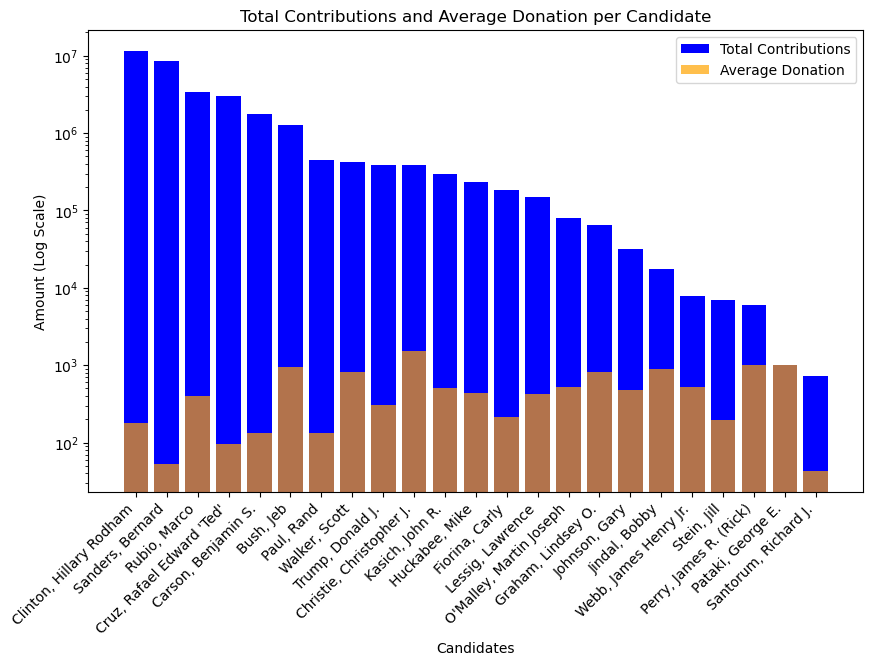

In [22]:
# 2e YOUR CODE HERE
plt.figure(figsize=(10, 6))

plt.bar(merged_table['Candidate'], merged_table['Total Contributions'], label='Total Contributions', color='blue')
plt.bar(merged_table['Candidate'], merged_table['Average Donation'], label='Average Donation', color='orange', alpha=0.7)

plt.yscale('log')
plt.xlabel('Candidates')
plt.ylabel('Amount (Log Scale)')
plt.title('Total Contributions and Average Donation per Candidate')

plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** Bernie seems to have the lowest average donation, yet one of the highest amounts of contributions. This could means many people who donated to him come from lower income backgrounds. George Pataki had the same average and total contributions, worth looking further into. Seems like many candidates with the highest total contributions had lower average donations. One idea that may affect this is that donors to candidates with lower contributions donate in higher quantities. Other than that, most of the data looks pretty normal.

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [23]:
# 3a YOUR CODE HERE
hillary_df = contrib[contrib['cand_nm'] == 'Clinton, Hillary Rodham']
top_jobs = hillary_df['contbr_occupation'].value_counts().head(5)

print(top_jobs)

RETIRED                  14180
ATTORNEY                  2832
INFORMATION REQUESTED     1758
TEACHER                   1520
HOMEMAKER                 1374
Name: contbr_occupation, dtype: int64


**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [24]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    top_jobs = df['contbr_occupation'].value_counts().head(5)
    return top_jobs

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [29]:
# 3c YOUR CODE HERE
bernie_df = contrib[contrib['cand_nm'] == 'Sanders, Bernard']
trump_df = contrib[contrib['cand_nm'] == 'Trump, Donald J.']

print('BERNIE')
print(get_donors(bernie_df))
print('------------')
print('HILLARY')
print(get_donors(hillary_df))
print('------------')
print('TRUMP')
print(get_donors(trump_df))

BERNIE
NOT EMPLOYED         42712
RETIRED               6763
TEACHER               4536
SOFTWARE ENGINEER     3549
ENGINEER              3183
Name: contbr_occupation, dtype: int64
------------
HILLARY
RETIRED                  14180
ATTORNEY                  2832
INFORMATION REQUESTED     1758
TEACHER                   1520
HOMEMAKER                 1374
Name: contbr_occupation, dtype: int64
------------
TRUMP
RETIRED                  455
INFORMATION REQUESTED     56
OWNER                     32
PRESIDENT                 26
CEO                       24
Name: contbr_occupation, dtype: int64


**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [32]:
# 3d YOUR CODE HERE
result_per_candidate = contrib.groupby('cand_nm').apply(get_donors)
print(result_per_candidate)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     495
                           HOMEMAKER                                    74
                           ATTORNEY                                     38
                           INFORMATION REQUESTED PER BEST EFFORTS       38
                           EXECUTIVE                                    32
Carson, Benjamin S.        RETIRED                                    6512
                           INFORMATION REQUESTED PER BEST EFFORTS      941
                           HOMEMAKER                                   512
                           PHYSICIAN                                   199
                           R.N.                                        145
Christie, Christopher J.   RETIRED                                      30
                           NONE                                         18
                           CEO    

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** It seems that Bernie and Hillary have a commonality in their top donors. Hillary's are retired and Bernie's are unemployed. In fact, many top occupations are retired. There are plenty of homemakers, attornies, and physicians as well.  

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** I hypothesized that Bernie's donors may be from a low income background due to his low average donation, and it turns out that his top occupation was not employed.  

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k